### Importing Dependencies

In [1]:
import pandas as pd        # Pandas to work with dataframes
import yfinance as yf	   # Taking Stock data from Yahoo finance
from src.utils import *    # Using our utility function

In [ ]:
import seaborn as sns	   # To make better plots

In [ ]:
df = pd.read_csv('datas/Log_returns_data.csv',parse_dates=["date"], index_col="date")
df.head()

,ABB.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASHOKLEY.NS,ASIANPAINT.NS,ASTRAL.NS,AUROPHARMA.NS,AXISBANK.NS,...,TVSMOTOR.NS,ULTRACEMCO.NS,UNIONBANK.NS,UNOMINDA.NS,UPL.NS,VEDL.NS,VOLTAS.NS,WIPRO.NS,YESBANK.NS,ZYDUSLIFE.NS
date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,-0.007338,0.004292,-0.024505,-0.020141,-0.030578,0.013397,0.002417,-0.002834,-0.016435,0.001159,...,-0.009062,-0.005809,-0.007886,-0.041391,0.004794,-0.012802,0.008099,-0.030075,-0.019186,0.000643
2008-01-04,0.006279,-0.003030,-0.028180,-0.011445,-0.001138,0.026268,0.001623,-0.049686,-0.008695,0.018224,...,-0.006323,-0.009876,0.007450,-0.055044,0.018820,-0.002485,0.002947,0.000906,-0.002496,-0.006289
2008-01-07,-0.006412,-0.013050,-0.010618,-0.005596,-0.020346,0.043485,0.060784,0.011861,-0.004235,0.032869,...,0.087657,0.011344,-0.013848,-0.027792,0.007404,-0.013227,-0.023820,-0.029008,0.012800,-0.003240
2008-01-08,-0.000967,-0.025720,-0.018462,-0.003866,-0.021498,-0.042560,0.029101,-0.059322,-0.019810,-0.022637,...,-0.069500,-0.017297,-0.005994,-0.036806,-0.024764,-0.008011,-0.032047,0.014303,-0.012223,-0.029145
2008-01-09,-0.004414,-0.041145,-0.020587,-0.000705,-0.017872,0.004615,-0.036967,-0.001445,-0.025032,0.027623,...,-0.013236,-0.012168,-0.024570,0.013816,0.034551,-0.038651,-0.010425,0.002857,-0.000384,0.002337


Let's see how our network looks for this entire timeline 

### 1. Constructing PMFG at different timelines

In [ ]:
G = make_PMFG_Network(df)

# network_plot(G, df, '2008-2022')  To see the interactive plot

![PMFG Network – 2015](figures/pmfg_2008-2022.png)


For a normal year like 2015, our network looks like this with the given features

In [ ]:
df_2015 = df.loc['2015-01-01':'2016-01-01']
G_2015 = make_PMFG_Network(df_2015)

compute_network_metrics(G_2015,print_imp_nodes=True)

Important Nodes 

The Central Nodes are :  [('ICICIBANK.NS', 0.38991), ('HDFCBANK.NS', 0.27608), ('AXISBANK.NS', 0.20174), ('LT.NS', 0.18291), ('YESBANK.NS', 0.16851)]
The Peripheral Nodes are :  [('ABB.NS', 0.0), ('APOLLOHOSP.NS', 0.0), ('ASTRAL.NS', 0.0), ('BHEL.NS', 0.0), ('BLUESTARCO.NS', 0.0)]



,max_degree,avg_clustering,degree_entropy,average_distance,efficiency,modularity
0,34,0.753981,2.903125,3.271833,0.359074,0.633172


![PMFG Network – 2015](figures/pmfg_2015.png)

In [ ]:
# network_plot(G_2015, df_2015, '2015') # To see interactive Plot

Lets see how our network looks during the 2008 and 2020 crash 

In [ ]:
df_2008 = df.loc['2008-01-01':'2008-01-01']
G_2008 = make_PMFG_Network(df_2008)

compute_network_metrics(G_2008,print_imp_nodes=True)


Important Nodes 

The Central Nodes are :  [('ABB.NS', 0.48114), ('ADANIENT.NS', 0.48114), ('ADANIPORTS.NS', 4e-05), ('AMBUJACEM.NS', 4e-05), ('APOLLOHOSP.NS', 4e-05)]
The Peripheral Nodes are :  [('YESBANK.NS', 0.0), ('ZYDUSLIFE.NS', 0.0), ('ADANIPORTS.NS', 4e-05), ('AMBUJACEM.NS', 4e-05), ('APOLLOHOSP.NS', 4e-05)]



,max_degree,avg_clustering,degree_entropy,average_distance,efficiency,modularity
0,123,0.823103,0.237851,1.952006,0.523997,NaN


![PMFG Network – 2015](figures/pmfg_2008.png)

In [ ]:
# network_plot(G_2008, df_2008, '2008')

In [ ]:
df_2020 = df.loc['2020-02-01':'2020-04-30']

G_2020 = make_PMFG_Network(df_2020)

compute_network_metrics(G_2020,print_imp_nodes=True)

Important Nodes 

The Central Nodes are :  [('ICICIBANK.NS', 0.35213), ('HINDALCO.NS', 0.33169), ('ULTRACEMCO.NS', 0.26165), ('VEDL.NS', 0.17604), ('JSWSTEEL.NS', 0.1537)]
The Peripheral Nodes are :  [('ABB.NS', 0.0), ('ASHOKLEY.NS', 0.0), ('AUROPHARMA.NS', 0.0), ('BEL.NS', 0.0), ('BLUESTARCO.NS', 0.0)]



,max_degree,avg_clustering,degree_entropy,average_distance,efficiency,modularity
0,30,0.740891,2.972063,3.472331,0.34397,0.677498


In [ ]:
# network_plot(G_2020,df_2020, '2020')

![PMFG Network – 2015](figures/pmfg_2020.png)

In [ ]:
%%time

G = make_PMFG_Network(df)
df_metrics = compute_network_metrics(G)

CPU times: total: 12.9 s
Wall time: 13.1 s


We could see that it takes a long to create a PMFG network, Because we want to make network featues and do not care alot about plotting, we could work with a MST network which is less complicated to create and still keeps the relevant information

### 2. Network Feature Engineering

In [ ]:
window = 60                       # The rolling window we use to make a network at t
step = 1
trading_days_in_a_year = 252

In [ ]:
dfs = []

df_post_2010 = df.loc["2010-01-01":]  # 2008 to 2009 market behavoir is too broken to construct a MST network

for t in range(window, len(df_post_2010), step):

	df_window = df_post_2010.iloc[t-window:t]

	G = make_MST_Network(df_window)
	row = MST_metrics(G)

	row['date'] = df_post_2010.index[t]

	dfs.append(row)

df_mst_rolling = pd.DataFrame(dfs)

df_mst_rolling["date"] = pd.to_datetime(df_mst_rolling["date"])
df_mst_rolling.set_index("date", inplace=True)

df_mst_rolling.head()


,avg_distance,diameter,efficiency,max_degree,degree_entropy,max_betweenness,avg_betweenness
date,,,,,,,
2010-04-01,7.568843,18,0.174720,9,1.940507,0.663201,0.053843
2010-04-05,7.086284,17,0.183332,10,1.948975,0.664934,0.049888
2010-04-06,7.943221,19,0.170439,9,1.936749,0.621351,0.056912
2010-04-07,8.168502,19,0.168448,9,1.957934,0.681861,0.058758
2010-04-08,7.505901,17,0.175571,9,1.920582,0.712915,0.053327


Here we are downloading the NIFTY 50 index data to obtain a baseline for the market

In [ ]:

nifty_df = yf.download("^NSEI", start="2009-12-31", end="2023-01-01", progress=False) # Download NIFTY 50 data

nifty_df = nifty_df[["Close"]]   # Keep only Close price

nifty_df.index = pd.to_datetime(nifty_df.index)  

nifty_df["returns"] = np.log(nifty_df["Close"]).diff()
nifty_df["volatility"] = nifty_df["returns"].rolling(window).std() * np.sqrt(trading_days_in_a_year)   # Not neccsesary to annualize 

nifty_df.index = pd.to_datetime(nifty_df.index)
nifty_df.columns = nifty_df.columns.droplevel(1)

nifty_df.dropna(inplace=True)

nifty_df.head()

Price,Close,returns,volatility
Date,,,
2010-04-01,5290.500000,0.007856,0.160007
2010-04-05,5368.399902,0.014617,0.162284
2010-04-06,5366.000000,-0.000447,0.161374
2010-04-07,5374.649902,0.001611,0.161394
2010-04-08,5304.450195,-0.013147,0.163554


Joining the metric dataframe with the baseline features to have the complete dataset we will work with

In [ ]:
df_merged = df_mst_rolling.join( nifty_df[["Close", "returns", "volatility"]],how="inner")

df_merged.head()

,avg_distance,diameter,efficiency,max_degree,degree_entropy,max_betweenness,avg_betweenness,Close,returns,volatility
date,,,,,,,,,,
2010-04-01,7.568843,18,0.174720,9,1.940507,0.663201,0.053843,5290.500000,0.007856,0.160007
2010-04-05,7.086284,17,0.183332,10,1.948975,0.664934,0.049888,5368.399902,0.014617,0.162284
2010-04-06,7.943221,19,0.170439,9,1.936749,0.621351,0.056912,5366.000000,-0.000447,0.161374
2010-04-07,8.168502,19,0.168448,9,1.957934,0.681861,0.058758,5374.649902,0.001611,0.161394
2010-04-08,7.505901,17,0.175571,9,1.920582,0.712915,0.053327,5304.450195,-0.013147,0.163554


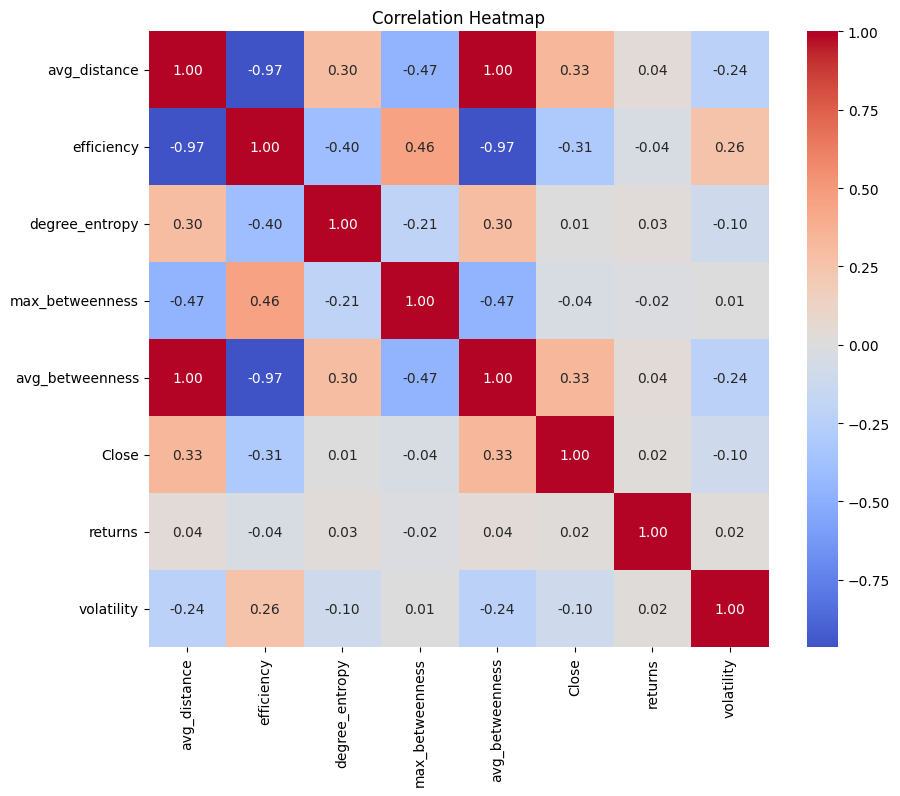

In [ ]:
cols_to_drop = ['max_degree', 'diameter']
df_subset = df_merged.drop(columns=cols_to_drop)

corr = df_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", center=0)
plt.title("Correlation Heatmap")
plt.show()

The interesting thing we could see is thet there are some good correlation between features and volitality but not alot with returns this gives us a signal that the network topology is useful in predicting market risk. Which makes sense theoretically also because during high stress periods the network topology changes alot, some notable ways are the stocks become more correlated causing the average distance between the stocks to decrease, which we could see here with the negative correlation. Also the market becomes more in sync so the disorder decreases, which we could see here by the negative correlation in the entropy and so on

In [ ]:
df_merged["vol_median"] = df_merged["volatility"].rolling(window).median()         # rolling median volatility (e.g. 60-day)

df_merged["vol_high"] = (df_merged["volatility"] > df_merged["vol_median"]).astype(int)    # binary target: high vs low volatility

df_merged = df_merged.dropna()
df_merged.head()

,avg_distance,diameter,efficiency,max_degree,degree_entropy,max_betweenness,avg_betweenness,Close,returns,volatility,vol_median,vol_high
date,,,,,,,,,,,,
2010-06-25,6.853790,16,0.186948,8,1.916924,0.650407,0.047982,5269.049805,-0.009736,0.193833,0.165092,1
2010-06-28,6.774325,14,0.187050,8,1.946656,0.625616,0.047331,5333.500000,0.012158,0.194770,0.165251,1
2010-06-29,6.784159,16,0.187051,8,1.910511,0.749833,0.047411,5256.149902,-0.014609,0.194697,0.165586,1
2010-06-30,6.945843,17,0.185223,9,1.932398,0.691990,0.048736,5312.500000,0.010664,0.196001,0.165925,1
2010-07-01,6.766195,16,0.187783,9,1.951740,0.773291,0.047264,5251.399902,-0.011568,0.197347,0.166383,1


In [ ]:
df_merged["vol_high"].value_counts(normalize=True)

vol_high
0    0.5324
1    0.4676
Name: proportion, dtype: float64

We could see that the regimes is approximately 50/50 so we could see that this is a good oppurtunity for a regression classification

## 3. Predicting volatility regimes using different features

Here, we work with three types of featurs to see wether our hypothesis is meaningful. We will make predictions using the scikit-learn library and using pytorch

### 1. Using Raw Features

In [ ]:
features = [
    "avg_distance",
	"efficiency",
    "degree_entropy",
    "max_betweenness",
    "max_degree",
    'diameter',
]
target = 'vol_high'

In [ ]:
df_reg = df_merged[features + ["vol_high"]]

for feature in features:  
	df_reg[feature] = df_reg[feature].shift(window)       # Applying shifting to the features to avoid look ahead bias and time leakage

df_reg = df_reg.dropna()
df_reg.head()

,avg_distance,efficiency,degree_entropy,max_betweenness,max_degree,diameter,vol_high
date,,,,,,,
2010-09-20,6.853790,0.186948,1.916924,0.650407,8.0,16.0,0
2010-09-21,6.774325,0.187050,1.946656,0.625616,8.0,14.0,0
2010-09-22,6.784159,0.187051,1.910511,0.749833,8.0,16.0,0
2010-09-23,6.945843,0.185223,1.932398,0.691990,9.0,17.0,0
2010-09-24,6.766195,0.187783,1.951740,0.773291,9.0,16.0,0


In [ ]:
def time_split(x, train_size = 0.75):
  i = int(len(x) * train_size)
  return x[:i].copy(), x[i:].copy()

df_reg_train, df_reg_test = time_split(df_reg, train_size = 0.7)

In [ ]:
X_train = df_reg_train[features]
y_train = df_reg_train[target]

X_test = df_reg_test[features]
y_test = df_reg_test[target]

--------------------------------------------------------------------------
Accuracy: 0.5497787610619469
ROC-AUC: 0.6314372034491708
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

           0       0.53      0.85      0.65       443
           1       0.65      0.26      0.37       461

    accuracy                           0.55       904
   macro avg       0.59      0.56      0.51       904
weighted avg       0.59      0.55      0.51       904

--------------------------------------------------------------------------


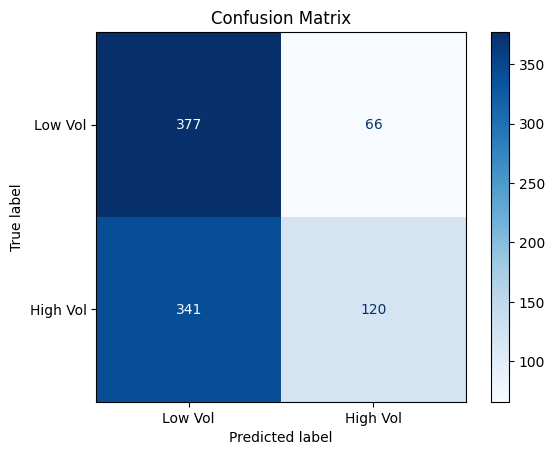

In [ ]:
Regression(X_train, X_test, y_train, y_test)

Epoch: 0 Loss: 0.7213698625564575
Epoch: 1500 Loss: 0.6933302283287048
Epoch: 3000 Loss: 0.6876174211502075
Epoch: 4500 Loss: 0.6850172877311707
Epoch: 6000 Loss: 0.6833618879318237
Epoch: 7500 Loss: 0.6822077631950378
Epoch: 9000 Loss: 0.6813626289367676
Epoch: 10500 Loss: 0.6807175874710083
Epoch: 12000 Loss: 0.6802074909210205
Epoch: 13500 Loss: 0.6797918081283569

Final weight: tensor([[-0.1488,  0.0857,  0.0904,  0.2545, -0.2594,  0.3102]])
Final bias: tensor([-0.2037])
--------------------------------------------------------------------------
Accuracy: 0.5497787610619469
ROC-AUC: 0.6013622363788604
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

         0.0       0.53      0.77      0.63       443
         1.0       0.60      0.34      0.43       461

    accuracy                           0.55       904
   macro avg       0.57      0.55      0.53       904
weighted 

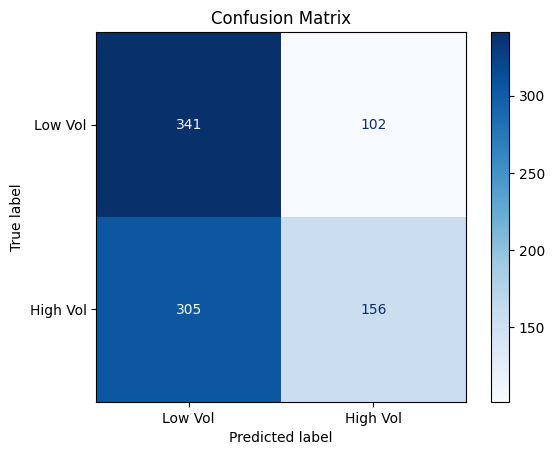

In [ ]:
Regression_Pytorch(X_train, X_test, y_train, y_test)

### 2. Using Princepal Component Features

Lets first create the principal component features

Explained variance per component: [0.6174702  0.16946477 0.11836304 0.06893372 0.02274761]
Cumulative explained variance: [0.6174702  0.78693497 0.90529801 0.97423173 0.99697933]
--------------------------------------------------------------------------
PCA Loadings:
                      PC1       PC2       PC3       PC4       PC5
avg_distance    -0.488458 -0.250818  0.180709  0.074190 -0.351934
efficiency       0.498519  0.096548 -0.184621  0.033357  0.522507
degree_entropy  -0.256216  0.783293  0.065449  0.559990  0.035007
max_betweenness  0.311360  0.093422  0.940257 -0.099533  0.001179
max_degree       0.390748 -0.414063 -0.003872  0.779734 -0.248382
diameter        -0.444535 -0.366121  0.211842  0.248801  0.734989
--------------------------------------------------------------------------


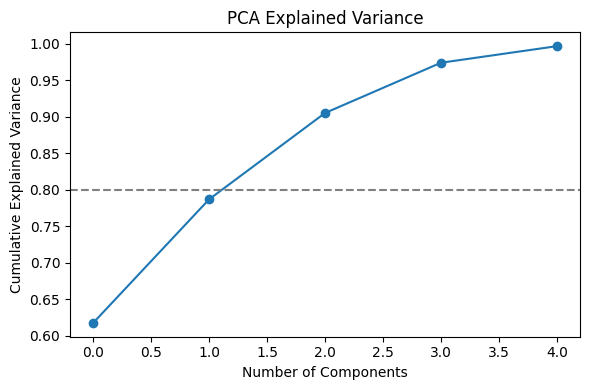

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num_components = 5

X = df_reg[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=num_components)  # choose components
X_pca = pca.fit_transform(X_scaled)

pc_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pc_columns, index=df_reg.index)

df_pca['vol_high'] = df_merged['vol_high']


explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)


print("Explained variance per component:", explained_var)
print("Cumulative explained variance:", cum_var)
print('--------------------------------------------------------------------------')

loadings = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f"PC{i+1}" for i in range(len(pc_columns))]
)

print("PCA Loadings:")
print(loadings)

print('--------------------------------------------------------------------------')
# 5. Plot Cummulative explained variance

plt.figure(figsize=(6,4))
plt.plot(cum_var, marker="o")
plt.axhline(0.8, linestyle="--", color="gray")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.tight_layout()
plt.show()

In [ ]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,vol_high
date,,,,,,
2010-09-20,0.992332,0.135531,-1.136763,-0.637358,0.200328,0
2010-09-21,0.879229,1.248152,-1.615836,-0.107708,-0.187238,0
2010-09-22,1.633721,0.120269,0.468122,-0.954709,0.220883,0
2010-09-23,1.028093,0.312606,-0.312588,0.111178,0.231603,0
2010-09-24,1.585985,1.208154,0.944520,0.305857,0.180294,0


In [ ]:
features = pc_columns
target = 'vol_high'

In [ ]:
df_pca_train,df_pca_test = time_split(df_pca, train_size = 0.7)

In [ ]:
X_train = df_pca_train[features]
y_train = df_pca_train[target]

X_test = df_pca_test[features]
y_test = df_pca_test[target]

--------------------------------------------------------------------------
Accuracy: 0.5763274336283186
ROC-AUC: 0.6406379301058157
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

           0       0.55      0.77      0.64       443
           1       0.64      0.39      0.48       461

    accuracy                           0.58       904
   macro avg       0.59      0.58      0.56       904
weighted avg       0.59      0.58      0.56       904

--------------------------------------------------------------------------


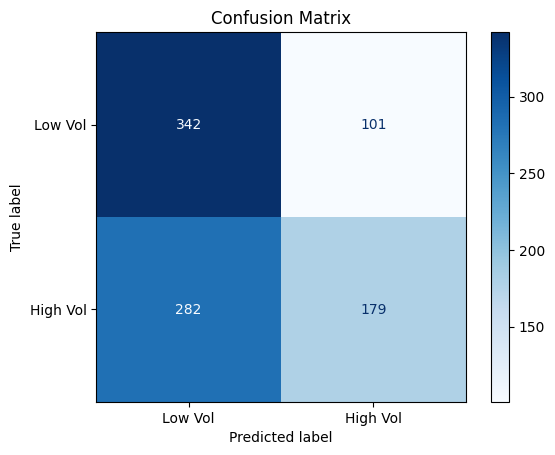

In [ ]:
Regression(X_train, X_test, y_train, y_test)

Epoch: 0 Loss: 0.7723983526229858
Epoch: 1500 Loss: 0.7269636988639832
Epoch: 3000 Loss: 0.7025166749954224
Epoch: 4500 Loss: 0.6899518966674805
Epoch: 6000 Loss: 0.6836610436439514
Epoch: 7500 Loss: 0.6805548667907715
Epoch: 9000 Loss: 0.679031491279602
Epoch: 10500 Loss: 0.6782865524291992
Epoch: 12000 Loss: 0.6779226064682007
Epoch: 13500 Loss: 0.6777446866035461

Final weight: tensor([[-0.1338,  0.1186,  0.2268, -0.0898,  0.0115]])
Final bias: tensor([-0.1830])
--------------------------------------------------------------------------
Accuracy: 0.5763274336283186
ROC-AUC: 0.6418718753519437
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

         0.0       0.55      0.74      0.63       443
         1.0       0.62      0.42      0.50       461

    accuracy                           0.58       904
   macro avg       0.59      0.58      0.57       904
weighted avg       

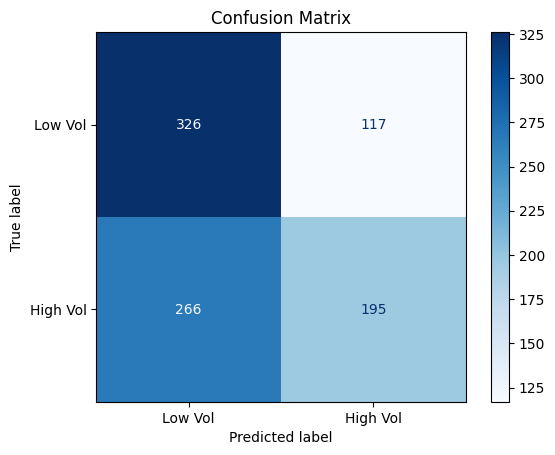

In [ ]:
Regression_Pytorch(X_train, X_test, y_train, y_test)

### 3. Using Log returns to make prediction (Baseline) 

In [ ]:
features = ['Close']
target = 'vol_high'

In [ ]:
df_prices = df_merged[features + ['vol_high']]

for feature in features:  
	df_prices[feature] = df_prices[feature].shift(window)

df_prices = df_prices.dropna()

In [ ]:
df_prices['vol_high'].value_counts(normalize=True)

vol_high
0    0.530389
1    0.469611
Name: proportion, dtype: float64

In [ ]:
df_prices_train, df_prices_test = time_split(df_prices,train_size=0.7)

In [ ]:
X_train = df_prices_train[features]
y_train = df_prices_train[target]

X_test = df_prices_test[features]
y_test = df_prices_test[target]

--------------------------------------------------------------------------
Accuracy: 0.5918141592920354
ROC-AUC: 0.5883960180782771
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

           0       0.82      0.21      0.34       443
           1       0.56      0.96      0.71       461

    accuracy                           0.59       904
   macro avg       0.69      0.58      0.52       904
weighted avg       0.69      0.59      0.52       904

--------------------------------------------------------------------------


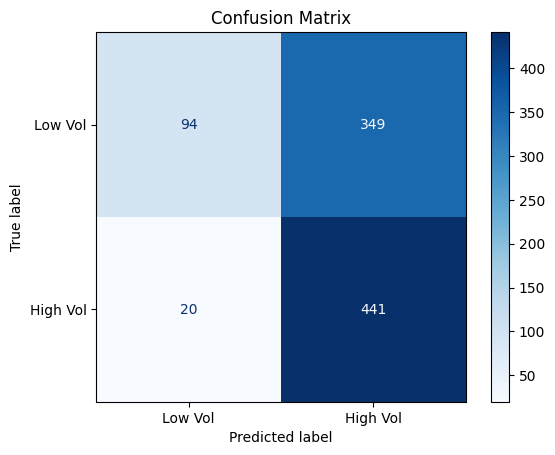

In [ ]:
Regression(X_train, X_test, y_train, y_test)

Epoch: 0 Loss: 0.9304994940757751
Epoch: 1500 Loss: 0.817128598690033
Epoch: 3000 Loss: 0.7520180344581604
Epoch: 4500 Loss: 0.7183637022972107
Epoch: 6000 Loss: 0.7019466757774353
Epoch: 7500 Loss: 0.6941307187080383
Epoch: 9000 Loss: 0.6904358863830566
Epoch: 10500 Loss: 0.6886890530586243
Epoch: 12000 Loss: 0.6878612041473389
Epoch: 13500 Loss: 0.6874679327011108

Final weight: tensor([[0.0858]])
Final bias: tensor([-0.1629])
--------------------------------------------------------------------------
Accuracy: 0.5962389380530974
ROC-AUC: 0.5883960180782771
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

         0.0       0.73      0.28      0.40       443
         1.0       0.57      0.90      0.70       461

    accuracy                           0.60       904
   macro avg       0.65      0.59      0.55       904
weighted avg       0.65      0.60      0.55       904

-

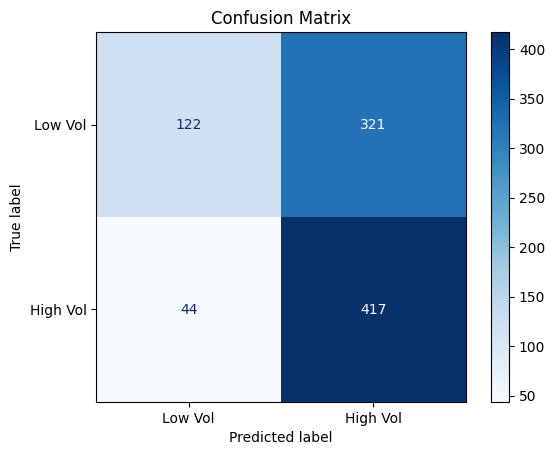

In [ ]:
Regression_Pytorch(X_train, X_test, y_train, y_test)